# 01. Exploratory Data Analysis (EDA)

## Mục tiêu
- Hiểu cấu trúc và đặc điểm của dataset
- Phát hiện outliers và dữ liệu bất thường
- Phân tích mối tương quan giữa các features
- Kiểm tra class imbalance

In [31]:
# Import thu vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cau hinh hien thi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')

## 1. Load va xem tong quan du lieu

In [32]:
# Doc du lieu
df = pd.read_csv('DataRaw/cardio_train.csv', sep=';')

print("Kich thuoc dataset:")
print(f"  - So dong (samples): {df.shape[0]:,}")
print(f"  - So cot (features): {df.shape[1]}")

Kich thuoc dataset:
  - So dong (samples): 70,000
  - So cot (features): 13


In [33]:
# Xem 10 dong dau tien
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [34]:
# Thong tin cau truc du lieu
print("Thong tin cac cot:")
df.info()

Thong tin cac cot:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [35]:
# Mo ta y nghia cac cot
mota_cot = {
    'id': 'Ma dinh danh benh nhan',
    'age': 'Tuoi (tinh bang NGAY, can chia 365.25)',
    'gender': 'Gioi tinh (1: Nu, 2: Nam)',
    'height': 'Chieu cao (cm)',
    'weight': 'Can nang (kg)',
    'ap_hi': 'Huyet ap tam thu (Systolic)',
    'ap_lo': 'Huyet ap tam truong (Diastolic)',
    'cholesterol': 'Muc cholesterol (1: Binh thuong, 2: Cao, 3: Rat cao)',
    'gluc': 'Muc glucose (1: Binh thuong, 2: Cao, 3: Rat cao)',
    'smoke': 'Hut thuoc (0: Khong, 1: Co)',
    'alco': 'Uong ruou (0: Khong, 1: Co)',
    'active': 'Hoat dong the chat (0: Khong, 1: Co)',
    'cardio': 'Benh tim mach (0: Khong, 1: Co) - TARGET'
}

print("\nMo ta y nghia cac cot:")
for cot, mota in mota_cot.items():
    print(f"  {cot:12} : {mota}")


Mo ta y nghia cac cot:
  id           : Ma dinh danh benh nhan
  age          : Tuoi (tinh bang NGAY, can chia 365.25)
  gender       : Gioi tinh (1: Nu, 2: Nam)
  height       : Chieu cao (cm)
  weight       : Can nang (kg)
  ap_hi        : Huyet ap tam thu (Systolic)
  ap_lo        : Huyet ap tam truong (Diastolic)
  cholesterol  : Muc cholesterol (1: Binh thuong, 2: Cao, 3: Rat cao)
  gluc         : Muc glucose (1: Binh thuong, 2: Cao, 3: Rat cao)
  smoke        : Hut thuoc (0: Khong, 1: Co)
  alco         : Uong ruou (0: Khong, 1: Co)
  active       : Hoat dong the chat (0: Khong, 1: Co)
  cardio       : Benh tim mach (0: Khong, 1: Co) - TARGET


## 2. Thong ke mo ta co ban

In [36]:
# Thong ke mo ta cho tat ca cac cot so
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Chuyen doi tuoi tu ngay sang nam
df['age_years'] = df['age'] / 365.25

print("Thong ke tuoi (da chuyen sang NAM):")
print(f"  - Tuoi nho nhat: {df['age_years'].min():.1f} tuoi")
print(f"  - Tuoi lon nhat: {df['age_years'].max():.1f} tuoi")
print(f"  - Tuoi trung binh: {df['age_years'].mean():.1f} tuoi")
print(f"  - Tuoi trung vi: {df['age_years'].median():.1f} tuoi")

Thong ke tuoi (da chuyen sang NAM):
  - Tuoi nho nhat: 29.6 tuoi
  - Tuoi lon nhat: 64.9 tuoi
  - Tuoi trung binh: 53.3 tuoi
  - Tuoi trung vi: 53.9 tuoi


In [38]:
# Kiem tra gia tri thieu (missing values)
print("Kiem tra Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  Khong co gia tri thieu!")
else:
    print(missing[missing > 0])

Kiem tra Missing Values:
  Khong co gia tri thieu!


In [39]:
# Kiem tra du lieu trung lap
so_trung = df.duplicated().sum()
print(f"So dong bi trung lap: {so_trung}")

So dong bi trung lap: 0


## 3. Phan tich bien muc tieu (Target Variable)

In [40]:
# Phan phoi bien muc tieu
print("Phan phoi bien cardio (benh tim):")
phan_phoi = df['cardio'].value_counts()
phan_phoi_percent = df['cardio'].value_counts(normalize=True) * 100

for label in [0, 1]:
    ten = "Khong benh" if label == 0 else "Co benh tim"
    print(f"  {label} ({ten}): {phan_phoi[label]:,} mau ({phan_phoi_percent[label]:.2f}%)")

Phan phoi bien cardio (benh tim):
  0 (Khong benh): 35,021 mau (50.03%)
  1 (Co benh tim): 34,979 mau (49.97%)


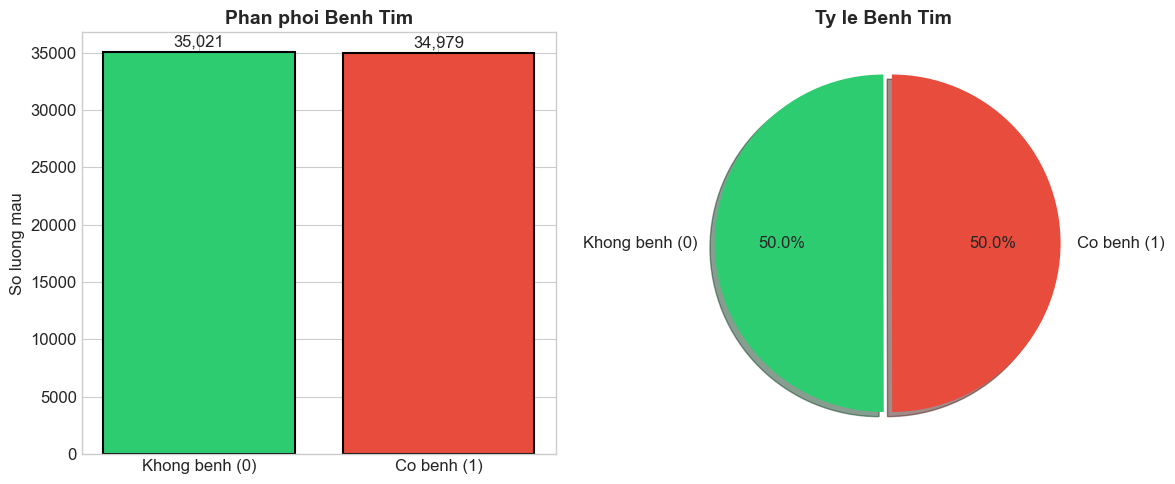


Nhan xet: Dataset khá can bang (~50-50), khong can xu ly class imbalance.


In [41]:
# Bieu do phan phoi bien muc tieu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
colors = ['#2ecc71', '#e74c3c']
labels = ['Khong benh (0)', 'Co benh (1)']
axes[0].bar(labels, phan_phoi.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Phan phoi Benh Tim', fontsize=14, fontweight='bold')
axes[0].set_ylabel('So luong mau')
for i, v in enumerate(phan_phoi.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=12)

# Pie chart
axes[1].pie(phan_phoi.values, labels=labels, autopct='%1.1f%%', 
            colors=colors, explode=[0, 0.05], shadow=True, startangle=90)
axes[1].set_title('Ty le Benh Tim', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/01_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nNhan xet: Dataset khá can bang (~50-50), khong can xu ly class imbalance.")

## 4. Phan tich cac bien so (Numerical Features)

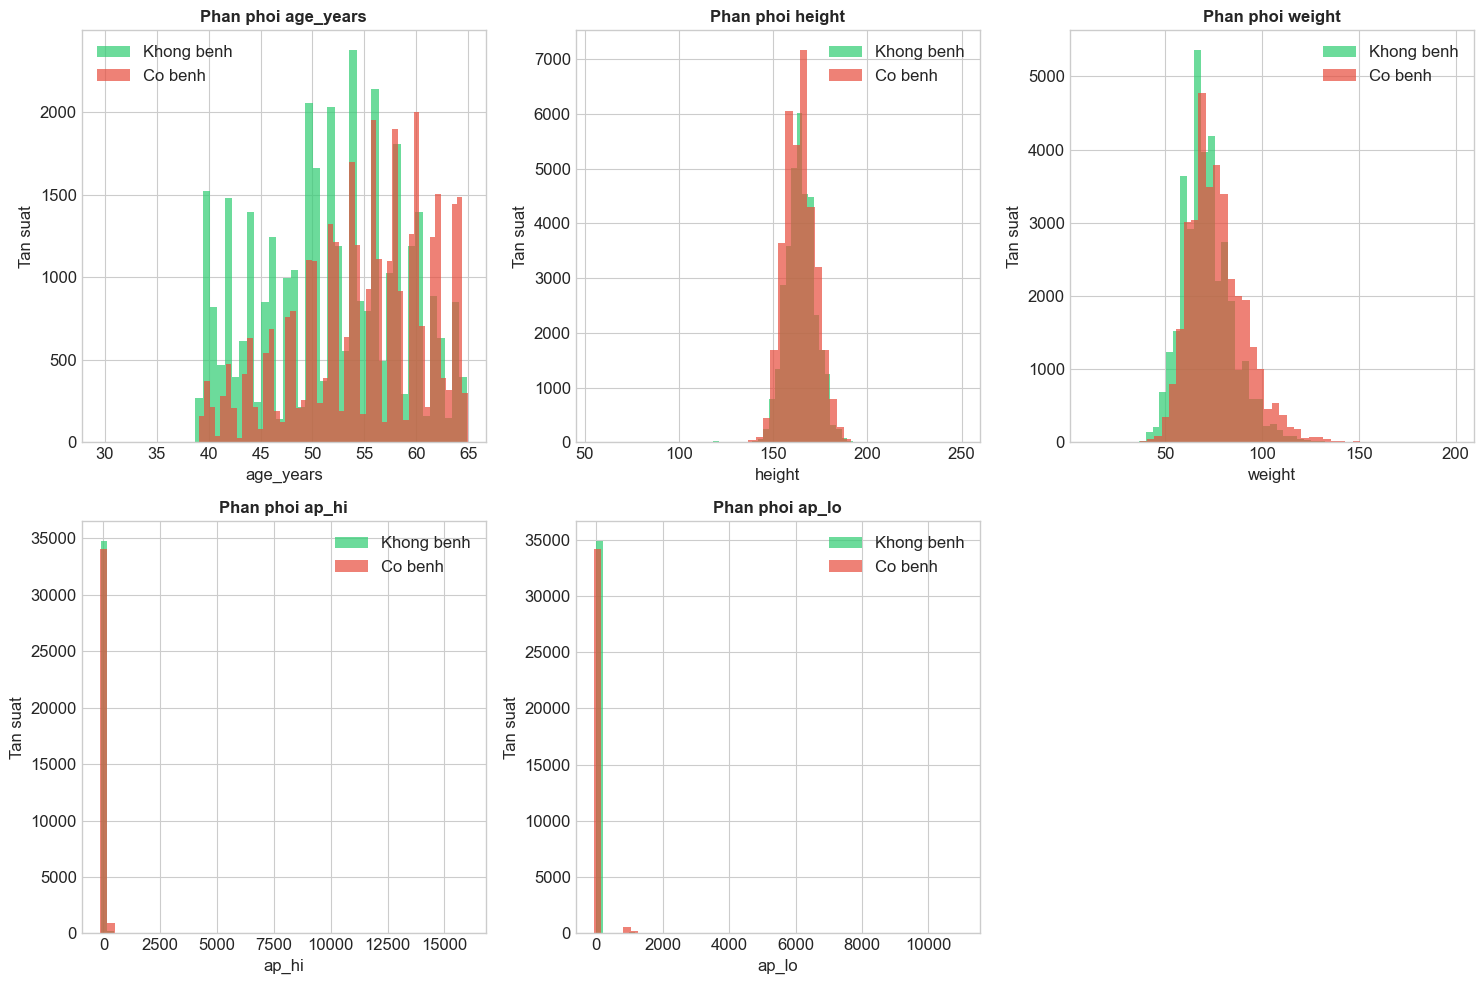

In [42]:
# Danh sach cac bien so
bien_so = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

# Ve histogram cho tung bien
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(bien_so):
    ax = axes[i]
    
    # Histogram theo nhom benh
    df[df['cardio']==0][col].hist(ax=ax, bins=50, alpha=0.7, label='Khong benh', color='#2ecc71')
    df[df['cardio']==1][col].hist(ax=ax, bins=50, alpha=0.7, label='Co benh', color='#e74c3c')
    
    ax.set_title(f'Phan phoi {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Tan suat')
    ax.legend()

# An o cuoi cung neu khong dung
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('outputs/02_numerical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

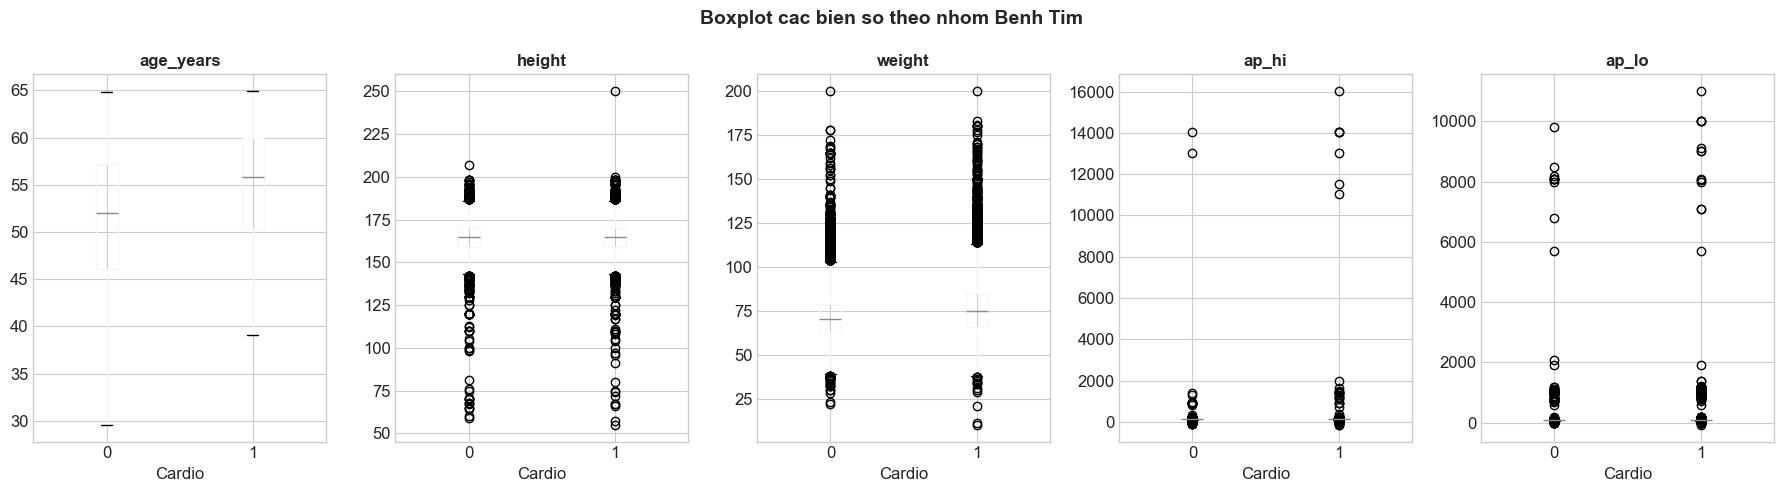

In [43]:
# Boxplot de phat hien outliers
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for i, col in enumerate(bien_so):
    ax = axes[i]
    df.boxplot(column=col, by='cardio', ax=ax)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('Cardio')

plt.suptitle('Boxplot cac bien so theo nhom Benh Tim', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/03_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Phat hien va Phan tich Outliers

In [44]:
# Phat hien outliers trong huyet ap
print("=" * 50)
print("PHAN TICH OUTLIERS HUYET AP")
print("=" * 50)

# Huyet ap tam thu (ap_hi)
print("\nHuyet ap tam thu (ap_hi):")
print(f"  Min: {df['ap_hi'].min()}, Max: {df['ap_hi'].max()}")
print(f"  Gia tri binh thuong: 90-180 mmHg")

# Dem outliers
ap_hi_thap = (df['ap_hi'] < 70).sum()
ap_hi_cao = (df['ap_hi'] > 250).sum()
print(f"  So mau ap_hi < 70: {ap_hi_thap}")
print(f"  So mau ap_hi > 250: {ap_hi_cao}")

# Huyet ap tam truong (ap_lo)
print("\nHuyet ap tam truong (ap_lo):")
print(f"  Min: {df['ap_lo'].min()}, Max: {df['ap_lo'].max()}")
print(f"  Gia tri binh thuong: 60-120 mmHg")

ap_lo_thap = (df['ap_lo'] < 40).sum()
ap_lo_cao = (df['ap_lo'] > 200).sum()
print(f"  So mau ap_lo < 40: {ap_lo_thap}")
print(f"  So mau ap_lo > 200: {ap_lo_cao}")

# Kiem tra ap_lo > ap_hi (bat thuong)
ap_logic_error = (df['ap_lo'] >= df['ap_hi']).sum()
print(f"\nSo mau ap_lo >= ap_hi (loi logic): {ap_logic_error}")

PHAN TICH OUTLIERS HUYET AP

Huyet ap tam thu (ap_hi):
  Min: -150, Max: 16020
  Gia tri binh thuong: 90-180 mmHg
  So mau ap_hi < 70: 189
  So mau ap_hi > 250: 40

Huyet ap tam truong (ap_lo):
  Min: -70, Max: 11000
  Gia tri binh thuong: 60-120 mmHg
  So mau ap_lo < 40: 59
  So mau ap_lo > 200: 953

So mau ap_lo >= ap_hi (loi logic): 1236


In [45]:
# Xem cac mau co outliers huyet ap
print("Mot so mau voi huyet ap bat thuong:")
outlier_samples = df[(df['ap_hi'] > 250) | (df['ap_lo'] > 200) | (df['ap_lo'] >= df['ap_hi'])]
print(f"Tong so mau outliers huyet ap: {len(outlier_samples)}")
outlier_samples[['id', 'ap_hi', 'ap_lo', 'cardio']].head(20)

Mot so mau voi huyet ap bat thuong:
Tong so mau outliers huyet ap: 1276


,id,ap_hi,ap_lo,cardio
228,314,160,1100,1
241,334,160,1000,1
260,357,140,800,1
329,458,160,1000,1
345,482,140,1000,1
473,680,150,1033,1
474,681,120,150,0
559,805,200,1000,1
567,815,14,90,1
613,886,140,1000,1


In [46]:
# Phan tich outliers chieu cao va can nang
print("\n" + "=" * 50)
print("PHAN TICH OUTLIERS CHIEU CAO & CAN NANG")
print("=" * 50)

print(f"\nChieu cao (height):")
print(f"  Min: {df['height'].min()} cm, Max: {df['height'].max()} cm")
height_thap = (df['height'] < 100).sum()
height_cao = (df['height'] > 220).sum()
print(f"  So mau height < 100cm: {height_thap}")
print(f"  So mau height > 220cm: {height_cao}")

print(f"\nCan nang (weight):")
print(f"  Min: {df['weight'].min()} kg, Max: {df['weight'].max()} kg")
weight_thap = (df['weight'] < 30).sum()
weight_cao = (df['weight'] > 200).sum()
print(f"  So mau weight < 30kg: {weight_thap}")
print(f"  So mau weight > 200kg: {weight_cao}")


PHAN TICH OUTLIERS CHIEU CAO & CAN NANG

Chieu cao (height):
  Min: 55 cm, Max: 250 cm
  So mau height < 100cm: 29
  So mau height > 220cm: 1

Can nang (weight):
  Min: 10.0 kg, Max: 200.0 kg
  So mau weight < 30kg: 7
  So mau weight > 200kg: 0


## 6. Phan tich cac bien phan loai (Categorical Features)

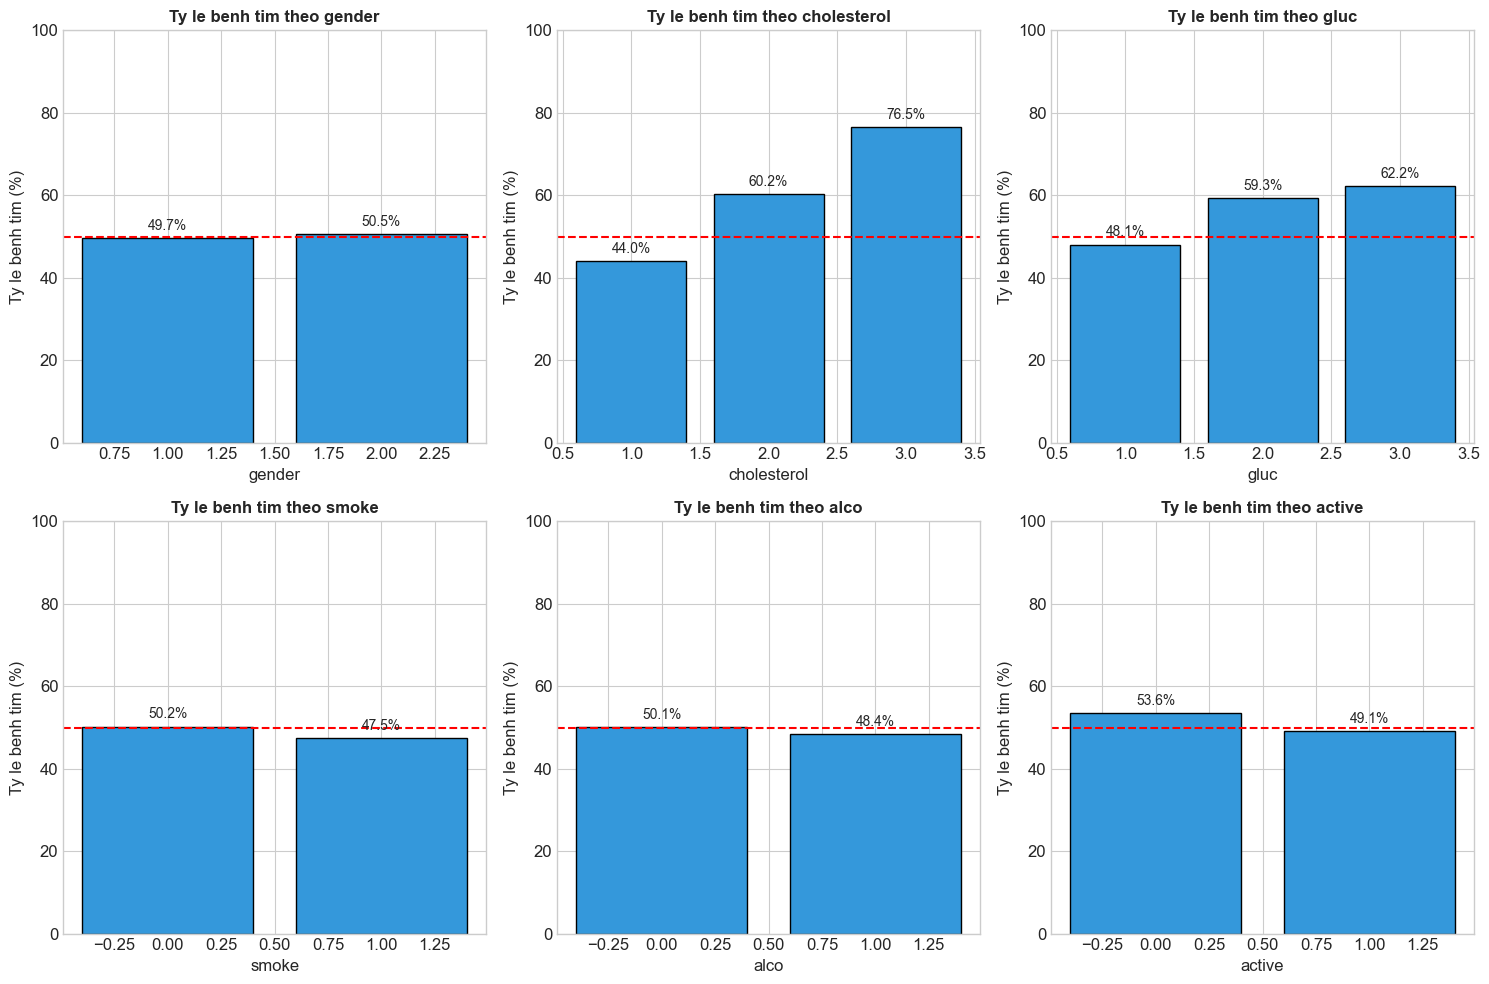

In [47]:
# Danh sach bien phan loai
bien_phanloai = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Ve bieu do phan phoi
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(bien_phanloai):
    ax = axes[i]
    
    # Tinh ty le benh tim theo tung nhom
    grouped = df.groupby(col)['cardio'].agg(['sum', 'count'])
    grouped['ty_le_benh'] = grouped['sum'] / grouped['count'] * 100
    
    bars = ax.bar(grouped.index, grouped['ty_le_benh'], color='#3498db', edgecolor='black')
    ax.axhline(y=50, color='red', linestyle='--', label='Ty le trung binh')
    ax.set_title(f'Ty le benh tim theo {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Ty le benh tim (%)')
    ax.set_ylim(0, 100)
    
    # Them so lieu len bar
    for bar, val in zip(bars, grouped['ty_le_benh']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{val:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('outputs/04_categorical_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

In [48]:
# Phan phoi chi tiet tung bien phan loai
print("PHAN PHOI CAC BIEN PHAN LOAI:")
print("=" * 50)

for col in bien_phanloai:
    print(f"\n{col}:")
    counts = df[col].value_counts().sort_index()
    for val, count in counts.items():
        pct = count / len(df) * 100
        benh_pct = df[df[col]==val]['cardio'].mean() * 100
        print(f"  {val}: {count:,} mau ({pct:.1f}%) - Ty le benh: {benh_pct:.1f}%")

PHAN PHOI CAC BIEN PHAN LOAI:

gender:
  1: 45,530 mau (65.0%) - Ty le benh: 49.7%
  2: 24,470 mau (35.0%) - Ty le benh: 50.5%

cholesterol:
  1: 52,385 mau (74.8%) - Ty le benh: 44.0%
  2: 9,549 mau (13.6%) - Ty le benh: 60.2%
  3: 8,066 mau (11.5%) - Ty le benh: 76.5%

gluc:
  1: 59,479 mau (85.0%) - Ty le benh: 48.1%
  2: 5,190 mau (7.4%) - Ty le benh: 59.3%
  3: 5,331 mau (7.6%) - Ty le benh: 62.2%

smoke:
  0: 63,831 mau (91.2%) - Ty le benh: 50.2%
  1: 6,169 mau (8.8%) - Ty le benh: 47.5%

alco:
  0: 66,236 mau (94.6%) - Ty le benh: 50.1%
  1: 3,764 mau (5.4%) - Ty le benh: 48.4%

active:
  0: 13,739 mau (19.6%) - Ty le benh: 53.6%
  1: 56,261 mau (80.4%) - Ty le benh: 49.1%


## 7. Phan tich tuong quan (Correlation Analysis)

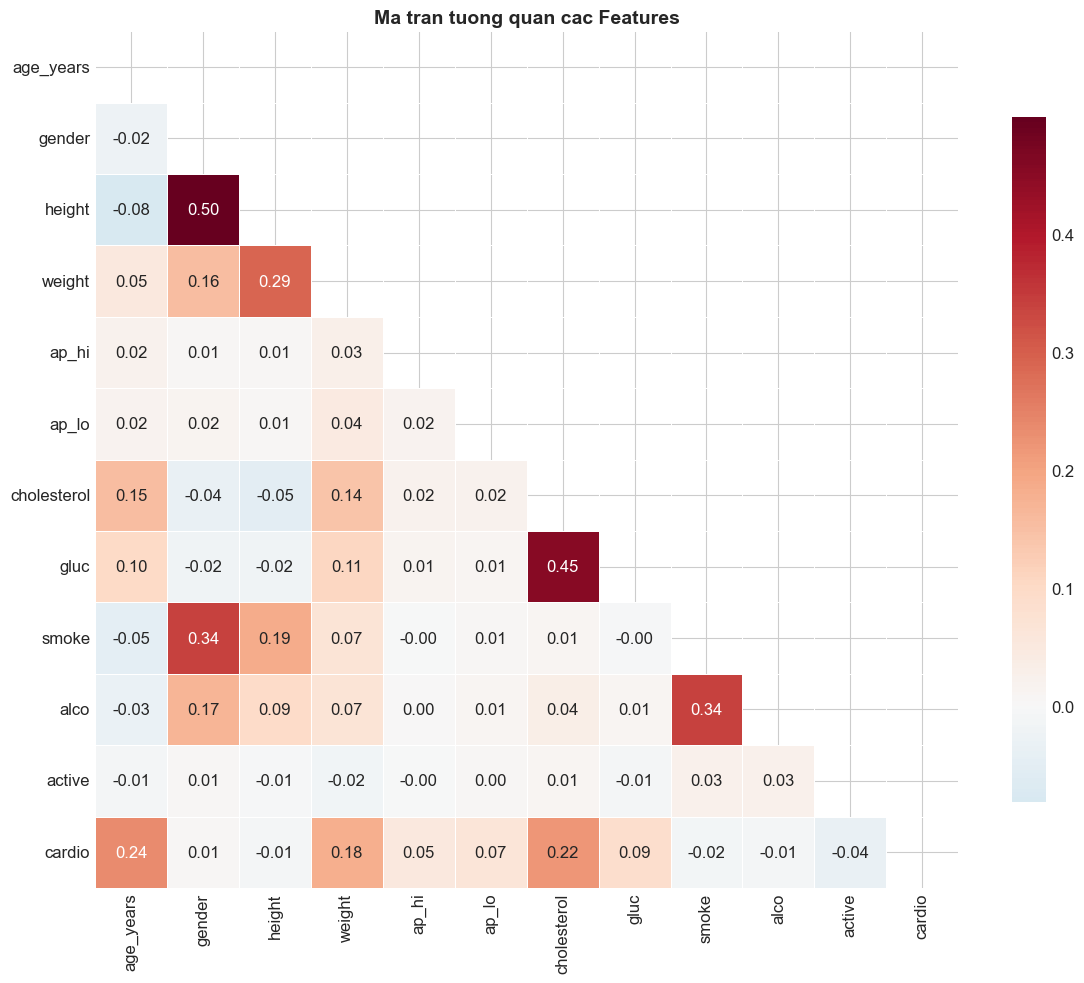

In [49]:
# Tinh he so tuong quan
cols_for_corr = ['age_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
corr_matrix = df[cols_for_corr].corr()

# Ve heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            mask=mask, fmt='.2f', linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Ma tran tuong quan cac Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/05_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

In [50]:
# Tuong quan voi bien muc tieu
print("TUONG QUAN VOI BIEN MUC TIEU (cardio):")
print("=" * 50)
corr_with_target = corr_matrix['cardio'].drop('cardio').sort_values(key=abs, ascending=False)

for feature, corr in corr_with_target.items():
    direction = "(+) Tang nguy co" if corr > 0 else "(-) Giam nguy co"
    strength = "Manh" if abs(corr) > 0.2 else "Trung binh" if abs(corr) > 0.1 else "Yeu"
    print(f"  {feature:12}: {corr:+.3f} - {strength} {direction}")

TUONG QUAN VOI BIEN MUC TIEU (cardio):
  age_years   : +0.238 - Manh (+) Tang nguy co
  cholesterol : +0.221 - Manh (+) Tang nguy co
  weight      : +0.182 - Trung binh (+) Tang nguy co
  gluc        : +0.089 - Yeu (+) Tang nguy co
  ap_lo       : +0.066 - Yeu (+) Tang nguy co
  ap_hi       : +0.054 - Yeu (+) Tang nguy co
  active      : -0.036 - Yeu (-) Giam nguy co
  smoke       : -0.015 - Yeu (-) Giam nguy co
  height      : -0.011 - Yeu (-) Giam nguy co
  gender      : +0.008 - Yeu (+) Tang nguy co
  alco        : -0.007 - Yeu (-) Giam nguy co


## 8. Tinh BMI va phan tich

In [51]:
# Tinh chi so BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

print("Thong ke BMI:")
print(f"  Min: {df['bmi'].min():.1f}")
print(f"  Max: {df['bmi'].max():.1f}")
print(f"  Trung binh: {df['bmi'].mean():.1f}")
print(f"  Trung vi: {df['bmi'].median():.1f}")

Thong ke BMI:
  Min: 3.5
  Max: 298.7
  Trung binh: 27.6
  Trung vi: 26.4


In [52]:
# Phan loai BMI theo WHO
def phan_loai_bmi(bmi):
    if bmi < 18.5:
        return 'Thieu can'
    elif bmi < 25:
        return 'Binh thuong'
    elif bmi < 30:
        return 'Thua can'
    else:
        return 'Beo phi'

df['bmi_category'] = df['bmi'].apply(phan_loai_bmi)

# Ty le benh theo nhom BMI
bmi_analysis = df.groupby('bmi_category')['cardio'].agg(['count', 'mean'])
bmi_analysis['mean'] = bmi_analysis['mean'] * 100
bmi_analysis.columns = ['So luong', 'Ty le benh (%)']

# Sap xep theo thu tu logic
order = ['Thieu can', 'Binh thuong', 'Thua can', 'Beo phi']
bmi_analysis = bmi_analysis.reindex(order)

print("\nPhan tich theo nhom BMI:")
print(bmi_analysis.to_string())


Phan tich theo nhom BMI:
              So luong  Ty le benh (%)
bmi_category                          
Thieu can          650       28.000000
Binh thuong      25790       40.131834
Thua can         25086       51.008531
Beo phi          18474       63.067013


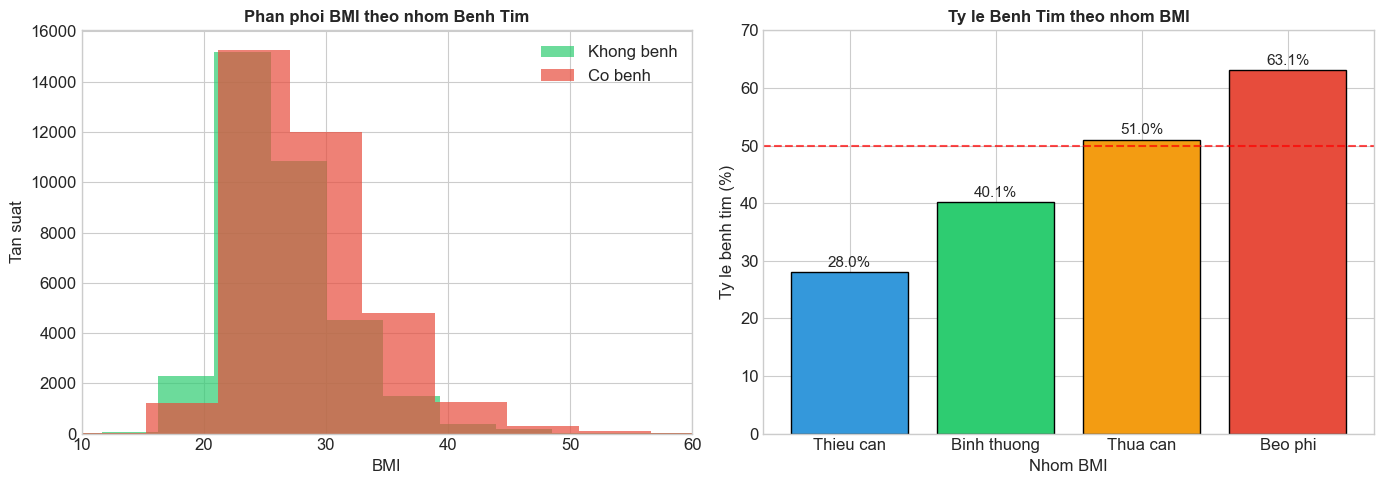

In [53]:
# Bieu do BMI vs Benh tim
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram BMI theo nhom benh
ax1 = axes[0]
df[df['cardio']==0]['bmi'].hist(ax=ax1, bins=50, alpha=0.7, label='Khong benh', color='#2ecc71')
df[df['cardio']==1]['bmi'].hist(ax=ax1, bins=50, alpha=0.7, label='Co benh', color='#e74c3c')
ax1.set_title('Phan phoi BMI theo nhom Benh Tim', fontsize=12, fontweight='bold')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Tan suat')
ax1.legend()
ax1.set_xlim(10, 60)

# Bar chart ty le benh theo BMI category
ax2 = axes[1]
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
bars = ax2.bar(order, bmi_analysis['Ty le benh (%)'].values, color=colors, edgecolor='black')
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.7)
ax2.set_title('Ty le Benh Tim theo nhom BMI', fontsize=12, fontweight='bold')
ax2.set_xlabel('Nhom BMI')
ax2.set_ylabel('Ty le benh tim (%)')
ax2.set_ylim(0, 70)

for bar, val in zip(bars, bmi_analysis['Ty le benh (%)'].values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{val:.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('outputs/06_bmi_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. Phan tich Huyet ap - Yeu to quan trong

In [54]:
# Loc du lieu huyet ap hop le de phan tich
df_valid_bp = df[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) & 
                 (df['ap_lo'] >= 40) & (df['ap_lo'] <= 200) &
                 (df['ap_hi'] > df['ap_lo'])].copy()

print(f"So mau sau khi loc huyet ap hop le: {len(df_valid_bp):,} / {len(df):,}")
print(f"So mau bi loai: {len(df) - len(df_valid_bp):,}")

So mau sau khi loc huyet ap hop le: 68,671 / 70,000
So mau bi loai: 1,329


In [55]:
# Phan loai huyet ap theo muc do
def phan_loai_huyet_ap(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Binh thuong'
    elif ap_hi < 130 and ap_lo < 80:
        return 'Tang nhe'
    elif ap_hi < 140 or ap_lo < 90:
        return 'Tang HA do 1'
    elif ap_hi < 180 or ap_lo < 120:
        return 'Tang HA do 2'
    else:
        return 'Khung hoang HA'

df_valid_bp['bp_category'] = df_valid_bp.apply(
    lambda x: phan_loai_huyet_ap(x['ap_hi'], x['ap_lo']), axis=1
)

# Phan tich ty le benh theo muc huyet ap
bp_order = ['Binh thuong', 'Tang nhe', 'Tang HA do 1', 'Tang HA do 2', 'Khung hoang HA']
bp_analysis = df_valid_bp.groupby('bp_category')['cardio'].agg(['count', 'mean'])
bp_analysis['mean'] = bp_analysis['mean'] * 100
bp_analysis.columns = ['So luong', 'Ty le benh (%)']
bp_analysis = bp_analysis.reindex(bp_order)

print("\nPhan tich theo muc do Huyet ap:")
print(bp_analysis.to_string())


Phan tich theo muc do Huyet ap:
                So luong  Ty le benh (%)
bp_category                             
Binh thuong         9555       22.155939
Tang nhe            3109       32.293342
Tang HA do 1       41761       45.130624
Tang HA do 2       14115       84.300390
Khung hoang HA       131       80.916031


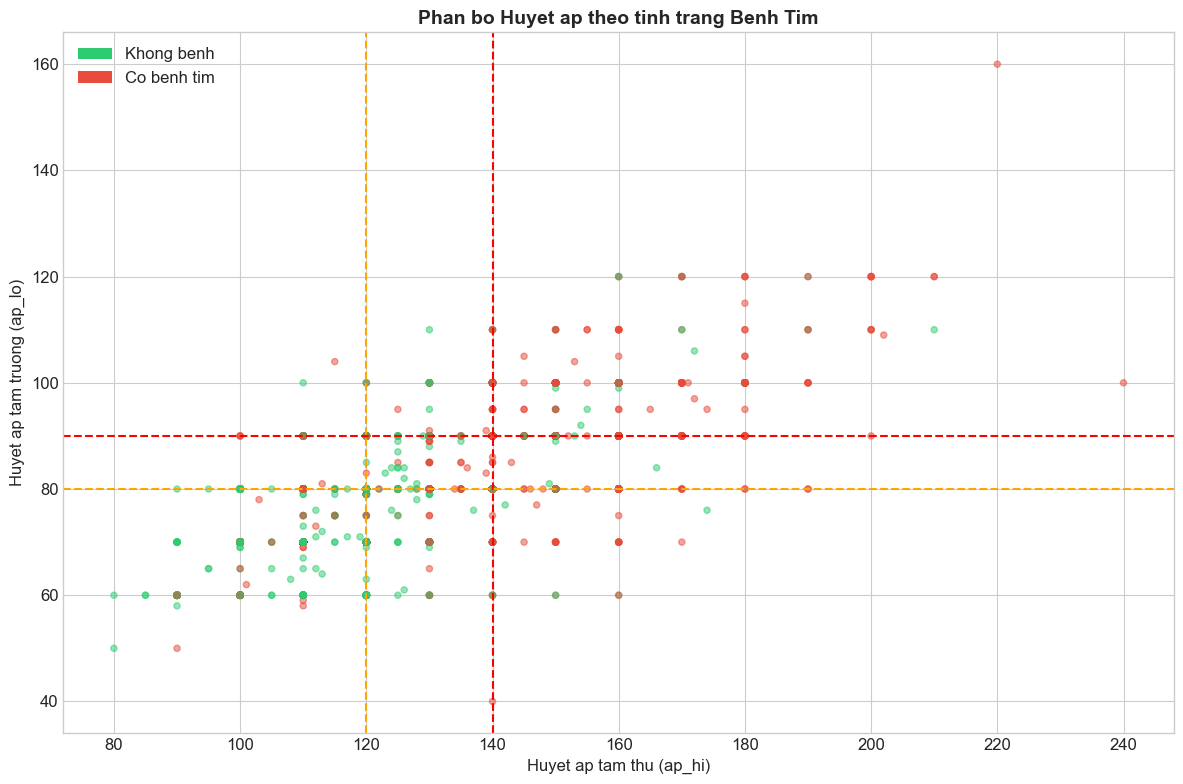

In [56]:
# Scatter plot huyet ap
fig, ax = plt.subplots(figsize=(12, 8))

# Sample 5000 diem de ve nhanh hon
sample_df = df_valid_bp.sample(n=min(5000, len(df_valid_bp)), random_state=42)

colors = sample_df['cardio'].map({0: '#2ecc71', 1: '#e74c3c'})
ax.scatter(sample_df['ap_hi'], sample_df['ap_lo'], c=colors, alpha=0.5, s=20)

# Ve cac nguong huyet ap
ax.axvline(x=120, color='orange', linestyle='--', label='Binh thuong (120)')
ax.axvline(x=140, color='red', linestyle='--', label='Tang HA do 1 (140)')
ax.axhline(y=80, color='orange', linestyle='--')
ax.axhline(y=90, color='red', linestyle='--')

ax.set_xlabel('Huyet ap tam thu (ap_hi)', fontsize=12)
ax.set_ylabel('Huyet ap tam truong (ap_lo)', fontsize=12)
ax.set_title('Phan bo Huyet ap theo tinh trang Benh Tim', fontsize=14, fontweight='bold')

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='Khong benh'),
    Patch(facecolor='#e74c3c', label='Co benh tim')
]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.savefig('outputs/07_blood_pressure_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

## 10. Phan tich Tuoi - Yeu to quan trong

In [57]:
# Phan nhom tuoi
def phan_nhom_tuoi(age):
    if age < 40:
        return '< 40'
    elif age < 50:
        return '40-49'
    elif age < 55:
        return '50-54'
    elif age < 60:
        return '55-59'
    else:
        return '60+'

df['age_group'] = df['age_years'].apply(phan_nhom_tuoi)

# Phan tich ty le benh theo tuoi
age_order = ['< 40', '40-49', '50-54', '55-59', '60+']
age_analysis = df.groupby('age_group')['cardio'].agg(['count', 'mean'])
age_analysis['mean'] = age_analysis['mean'] * 100
age_analysis.columns = ['So luong', 'Ty le benh (%)']
age_analysis = age_analysis.reindex(age_order)

print("Phan tich theo nhom Tuoi:")
print(age_analysis.to_string())

Phan tich theo nhom Tuoi:
           So luong  Ty le benh (%)
age_group                          
< 40           1884       23.885350
40-49         19773       38.001315
50-54         17090       46.693973
55-59         18473       56.677313
60+           12780       67.018779


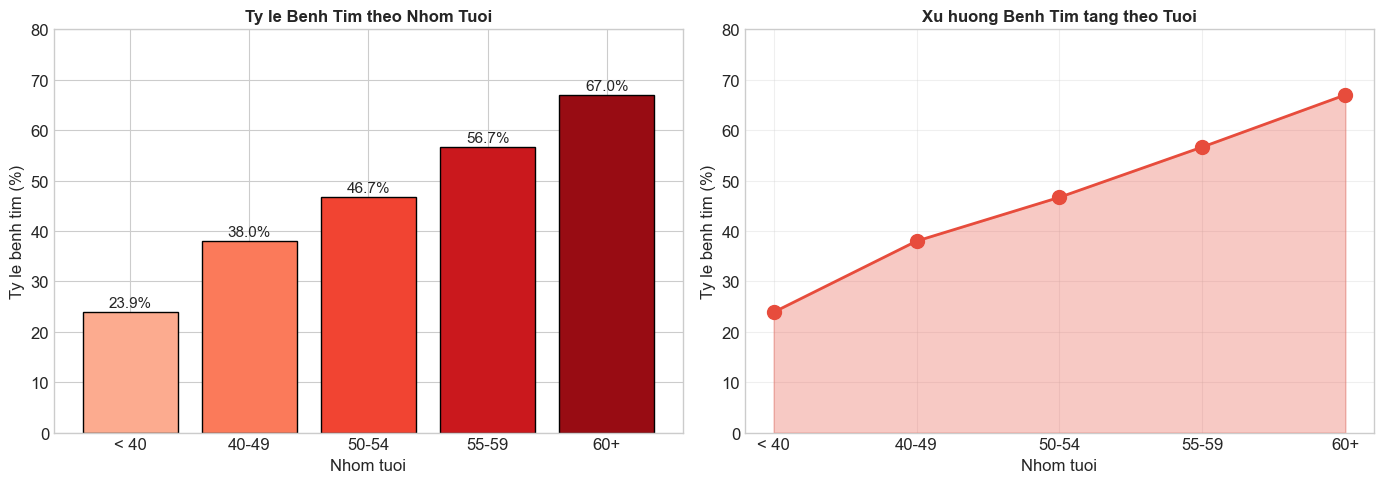


Nhan xet: Ty le benh tim tang ro ret theo tuoi, dac biet tu 50 tuoi tro len.


In [58]:
# Bieu do tuoi vs benh tim
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart ty le benh theo nhom tuoi
ax1 = axes[0]
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(age_order)))
bars = ax1.bar(age_order, age_analysis['Ty le benh (%)'].values, color=colors, edgecolor='black')
ax1.set_title('Ty le Benh Tim theo Nhom Tuoi', fontsize=12, fontweight='bold')
ax1.set_xlabel('Nhom tuoi')
ax1.set_ylabel('Ty le benh tim (%)')
ax1.set_ylim(0, 80)

for bar, val in zip(bars, age_analysis['Ty le benh (%)'].values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{val:.1f}%', ha='center', fontsize=11)

# Line chart xu huong
ax2 = axes[1]
ax2.plot(age_order, age_analysis['Ty le benh (%)'].values, 'o-', color='#e74c3c', 
         linewidth=2, markersize=10)
ax2.fill_between(age_order, age_analysis['Ty le benh (%)'].values, alpha=0.3, color='#e74c3c')
ax2.set_title('Xu huong Benh Tim tang theo Tuoi', fontsize=12, fontweight='bold')
ax2.set_xlabel('Nhom tuoi')
ax2.set_ylabel('Ty le benh tim (%)')
ax2.set_ylim(0, 80)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/08_age_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nNhan xet: Ty le benh tim tang ro ret theo tuoi, dac biet tu 50 tuoi tro len.")

## 11. Tong ket EDA

In [59]:
print("=" * 60)
print("TONG KET EXPLORATORY DATA ANALYSIS")
print("=" * 60)

print("\n1. THONG TIN DATASET:")
print(f"   - Tong so mau: {len(df):,}")
print(f"   - So features: {len(df.columns) - 3} (tru id, age_years, bmi_category, age_group)")
print(f"   - Khong co missing values")
print(f"   - Class balance: ~50% (khong can xu ly imbalance)")

print("\n2. VAN DE CAN XU LY:")
print(f"   - Outliers huyet ap: {len(df) - len(df_valid_bp):,} mau can loai")
print(f"   - Age: Can chuyen tu ngay sang nam")
print(f"   - Can tinh BMI tu height va weight")

print("\n3. CAC YEU TO LIEN QUAN MANH DEN BENH TIM:")
print("   - Huyet ap (ap_hi, ap_lo): Tuong quan manh nhat")
print("   - Tuoi (age): Tuong quan duong (cao tuoi = nguy co cao)")
print("   - Cholesterol: Muc cao/rat cao tang nguy co")
print("   - BMI: Beo phi tang nguy co benh tim")
print("   - Glucose: Muc cao tang nguy co")

print("\n4. DE XUAT XU LY CHO BUOC TIEP THEO:")
print("   - Loai bo outliers huyet ap")
print("   - Tao feature BMI")
print("   - Tao feature pulse_pressure = ap_hi - ap_lo")
print("   - Chuyen age sang nam")
print("   - Scale cac features so")

TONG KET EXPLORATORY DATA ANALYSIS

1. THONG TIN DATASET:
   - Tong so mau: 70,000
   - So features: 14 (tru id, age_years, bmi_category, age_group)
   - Khong co missing values
   - Class balance: ~50% (khong can xu ly imbalance)

2. VAN DE CAN XU LY:
   - Outliers huyet ap: 1,329 mau can loai
   - Age: Can chuyen tu ngay sang nam
   - Can tinh BMI tu height va weight

3. CAC YEU TO LIEN QUAN MANH DEN BENH TIM:
   - Huyet ap (ap_hi, ap_lo): Tuong quan manh nhat
   - Tuoi (age): Tuong quan duong (cao tuoi = nguy co cao)
   - Cholesterol: Muc cao/rat cao tang nguy co
   - BMI: Beo phi tang nguy co benh tim
   - Glucose: Muc cao tang nguy co

4. DE XUAT XU LY CHO BUOC TIEP THEO:
   - Loai bo outliers huyet ap
   - Tao feature BMI
   - Tao feature pulse_pressure = ap_hi - ap_lo
   - Chuyen age sang nam
   - Scale cac features so


In [60]:
# Luu dataset da them cac features moi de tham khao
# (Chua xu ly outliers - se lam o notebook 02)
print("\nLuu dataset voi cac features moi de tham khao...")
df.to_csv('outputs/cardio_eda_explored.csv', index=False)
print("Da luu: outputs/cardio_eda_explored.csv")


Luu dataset voi cac features moi de tham khao...
Da luu: outputs/cardio_eda_explored.csv
